# South Florida City Analysis

## 1. Importing all the required libraries

In [1061]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1062]:
import requests
from bs4 import BeautifulSoup

## 2. Get the data from web and creating data frame

In [1063]:
page = requests.get('https://en.wikipedia.org/wiki/South_Florida#Cities')

In [1064]:
soup = BeautifulSoup(page.content, 'html.parser')

In [1065]:
table = soup.find('table', {"class" : "wikitable sortable"})

In [1066]:
table.findAll('tr')

[<tr>
 <th>City
 </th>
 <th>2010 population<sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup>
 </th>
 <th>2000 population
 </th>
 <th>County
 </th></tr>, <tr>
 <td><a href="/wiki/Miami" title="Miami">Miami</a>
 </td>
 <td>399,457
 </td>
 <td>362,470
 </td>
 <td>Miami-Dade
 </td></tr>, <tr>
 <td><a class="mw-redirect" href="/wiki/Hialeah" title="Hialeah">Hialeah</a>
 </td>
 <td>224,669
 </td>
 <td>226,419
 </td>
 <td>Miami-Dade
 </td></tr>, <tr>
 <td><a href="/wiki/Fort_Lauderdale,_Florida" title="Fort Lauderdale, Florida">Fort Lauderdale</a>
 </td>
 <td>165,521
 </td>
 <td>152,397
 </td>
 <td>Broward
 </td></tr>, <tr>
 <td><a href="/wiki/Port_St._Lucie,_Florida" title="Port St. Lucie, Florida">Port St. Lucie</a>
 </td>
 <td>164,603
 </td>
 <td>88,769
 </td>
 <td>St. Lucie
 </td></tr>, <tr>
 <td><a class="mw-redirect" href="/wiki/Pembroke_Pines" title="Pembroke Pines">Pembroke Pines</a>
 </td>
 <td>154,750
 </td>
 <td>137,427
 </td>
 <td>Broward
 </td></tr>, <tr

In [1067]:
table.findAll('td')

[<td><a href="/wiki/Miami" title="Miami">Miami</a>
 </td>, <td>399,457
 </td>, <td>362,470
 </td>, <td>Miami-Dade
 </td>, <td><a class="mw-redirect" href="/wiki/Hialeah" title="Hialeah">Hialeah</a>
 </td>, <td>224,669
 </td>, <td>226,419
 </td>, <td>Miami-Dade
 </td>, <td><a href="/wiki/Fort_Lauderdale,_Florida" title="Fort Lauderdale, Florida">Fort Lauderdale</a>
 </td>, <td>165,521
 </td>, <td>152,397
 </td>, <td>Broward
 </td>, <td><a href="/wiki/Port_St._Lucie,_Florida" title="Port St. Lucie, Florida">Port St. Lucie</a>
 </td>, <td>164,603
 </td>, <td>88,769
 </td>, <td>St. Lucie
 </td>, <td><a class="mw-redirect" href="/wiki/Pembroke_Pines" title="Pembroke Pines">Pembroke Pines</a>
 </td>, <td>154,750
 </td>, <td>137,427
 </td>, <td>Broward
 </td>, <td><a href="/wiki/Hollywood,_Florida" title="Hollywood, Florida">Hollywood</a>
 </td>, <td>140,768
 </td>, <td>139,368
 </td>, <td>Broward
 </td>, <td><a href="/wiki/Miramar,_Florida" title="Miramar, Florida">Miramar</a>
 </td>, <td>12

In [1068]:
#Getting Values from the HTML and changing this to data frame
Florida = []

#Loop through tables to get the values from the 4 columns
for row in table.findAll('tr'):
    col = row.findAll('td')
    if len(col) == 4:
        Florida.append((col[0].text.strip(), col[1].text.strip(), col[2].text.strip(), col[3].text.strip()))


In [1069]:
#Converting the list to an array
Florida = np.asarray(Florida)

In [1070]:
#Converting the array to a data frame
Florida = pd.DataFrame(Florida)
print(Florida.shape)
Florida.head()

(28, 4)


,0,1,2,3
0,Miami,"399,457","362,470",Miami-Dade
1,Hialeah,"224,669","226,419",Miami-Dade
2,Fort Lauderdale,"165,521","152,397",Broward
3,Port St. Lucie,"164,603","88,769",St. Lucie
4,Pembroke Pines,"154,750","137,427",Broward


In [1071]:
#Naming the columns
names = ['City', '2010', '2000', 'County']
Florida.columns = names
Florida.head()

,City,2010,2000,County
0,Miami,"399,457","362,470",Miami-Dade
1,Hialeah,"224,669","226,419",Miami-Dade
2,Fort Lauderdale,"165,521","152,397",Broward
3,Port St. Lucie,"164,603","88,769",St. Lucie
4,Pembroke Pines,"154,750","137,427",Broward


In [1072]:
#Checking the cities by counties
Florida.County.value_counts()

Broward       15
Miami-Dade     6
Palm Beach     6
St. Lucie      1
Name: County, dtype: int64

In [1073]:
#Drop the columns of years
Florida = Florida.drop(columns=['2010','2000'])

In [1074]:
#Add counties to the cities to get the accurate co-ordinates
Florida['Address'] = Florida.City + ', ' + Florida.County

## 3. Getting the data of co-ordinates and merging with the cities data

In [1075]:
#Import CSV with co-ordinates
values = pd.read_csv('South Florida City Co-Ordinates - Sheet1.csv')

In [1076]:
values

,Address,Latitude,Longitude
0,"Miami, Miami-Dade",25.7617,-80.1918
1,"Hialeah, Miami-Dade",25.8576,-80.2781
2,"Fort Lauderdale, Broward",26.1224,-80.1373
3,"Port St. Lucie, St. Lucie",27.2730,-80.3582
4,"Pembroke Pines, Broward",26.0078,-80.2963
5,"Hollywood, Broward",26.0112,-80.1495
6,"Miramar, Broward",25.9861,-80.3036
7,"Coral Springs, Broward",26.2712,-80.2706
8,"Miami Gardens, Miami-Dade",25.9420,-80.2456
9,"West Palm Beach, Palm Beach",26.7153,-80.0534


In [1077]:
#Merge the values to get locations
Neighborhoods = Florida.merge(values, on = 'Address', how = 'left')

In [1078]:
#Check the merged table
Neighborhoods.head()

,City,County,Address,Latitude,Longitude
0,Miami,Miami-Dade,"Miami, Miami-Dade",25.7617,-80.1918
1,Hialeah,Miami-Dade,"Hialeah, Miami-Dade",25.8576,-80.2781
2,Fort Lauderdale,Broward,"Fort Lauderdale, Broward",26.1224,-80.1373
3,Port St. Lucie,St. Lucie,"Port St. Lucie, St. Lucie",27.2730,-80.3582
4,Pembroke Pines,Broward,"Pembroke Pines, Broward",26.0078,-80.2963


In [1079]:
Neighborhoods.Latitude = Neighborhoods.Latitude.astype(float)
Neighborhoods.Longitude = Neighborhoods.Longitude.astype(float)

## 4. Creating map of South Florida and using the cities to show on map

In [1080]:
#Setting up South Florida lat long values
Latitude = 25.76268
Longitude = -80.291890

In [1081]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.1
  latest version: 4.6.7

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/rama/miniconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1b             |       h1de35cc_0         3.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be UPDATED:

  openssl                              1.1.1a-h1de35cc_1000 --> 1.1.1b-h1de35cc_0



openssl-1.1.1b       | 3.5 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Libraries imported.


In [1082]:
South_Florida_Map = folium.Map(location=[Latitude, Longitude], zoom_start=8)
South_Florida_Map

In [1083]:
for lat, lng, label in zip(Neighborhoods['Latitude'], Neighborhoods['Longitude'], Neighborhoods['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(South_Florida_Map)  
    
South_Florida_Map

## 5. Get the values from the Foursquare API to find the venues near by and explore them

In [1157]:
# The code was removed by Watson Studio for sharing.

In [1085]:
Neighborhoods.loc[15,'City']

'Boca Raton'

In [1086]:
#Get the lat long values of the neighbourhood
neighborhood_latitude = Neighborhoods.loc[15, 'Latitude'] 
neighborhood_longitude = Neighborhoods.loc[15, 'Longitude'] 

In [1087]:
###Getting the top 100 venues within 1000 metres radius
limit = 50
radius = 1000

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    limit)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=NOL1IFHCN4TAEIL4BUWRQY0SFYC2TWTDUNOHC23YKFL5HJ1I&client_secret=1ZBK5ZR1B1EZOWLIOISYWQFLNYBGC1GOB4EO5NU1HFQLHKVG&v=20190221&ll=26.3683,-80.1289&radius=1000&limit=50'

In [1088]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c80f8d3351e3d13a707a76f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Boca Raton',
  'headerFullLocation': 'Boca Raton',
  'headerLocationGranularity': 'city',
  'totalResults': 92,
  'suggestedBounds': {'ne': {'lat': 26.37730000900001,
    'lng': -80.11887362744503},
   'sw': {'lat': 26.359299990999993, 'lng': -80.13892637255498}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc761cc8b7c9c74dc5836cf',
       'name': "Laspada's",
       'location': {'address': '2240 NW 19th St',
        'crossStreet': 'at Butts Rd.',
        'lat': 26.366328727032442,
        'lng': -80.12781976554379,
        'labeledLatLngs': [{'label': 'display',
      

In [1089]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [1090]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Laspada's,Sandwich Place,26.366329,-80.127820
1,The Cheesecake Factory,American Restaurant,26.367446,-80.129924
2,Starbucks,Coffee Shop,26.367721,-80.125955
3,Abe & Louie's,Steakhouse,26.367578,-80.125443
4,New York Prime,Steakhouse,26.370093,-80.126075
5,Barkan Method Of Hot Yoga - Boca,Yoga Studio,26.365997,-80.127873
6,Nick's New Haven Style Pizzeria and Bar,Pizza Place,26.366246,-80.126448
7,The Capital Grille,American Restaurant,26.366453,-80.132999
8,Seasons 52,New American Restaurant,26.369587,-80.124722
9,Saks Fifth Avenue,Department Store,26.364876,-80.131139


In [1091]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare.


In [1092]:
#Exploring Palm Beach
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [1093]:
South_Florida_venues = pd.DataFrame(getNearbyVenues(names=Neighborhoods['City'],
                                   latitudes=Neighborhoods['Latitude'],
                                   longitudes=Neighborhoods['Longitude']
                                  ))

Miami
Hialeah
Fort Lauderdale
Port St. Lucie
Pembroke Pines
Hollywood
Miramar
Coral Springs
Miami Gardens
West Palm Beach
Pompano Beach
Davie
Miami Beach
Plantation
Sunrise
Boca Raton
Deerfield Beach
Boynton Beach
Lauderhill
Weston
Delray Beach
Homestead
Tamarac
North Miami
Wellington
Jupiter
Margate
Coconut Creek


In [1094]:
print(South_Florida_venues.shape)

(948, 7)


In [1095]:
#merge the cities with venues
South_Florida_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Miami,25.7617,-80.1918,Vapiano,25.761061,-80.191612,Italian Restaurant
1,Miami,25.7617,-80.1918,CVS pharmacy,25.761761,-80.191552,Pharmacy
2,Miami,25.7617,-80.1918,Casa De Montecristo by Prime Cigar & Whiskey Bar,25.763206,-80.192966,Smoke Shop
3,Miami,25.7617,-80.1918,La Petite Maison,25.760663,-80.189943,French Restaurant
4,Miami,25.7617,-80.1918,The SLS Brickell,25.761582,-80.193663,Hotel


In [1096]:
print('There are {} uniques categories.'.format(len(South_Florida_venues['Venue Category'].unique())))

There are 196 uniques categories.


In [1097]:
#Analyzing each category
# one hot encoding
SF_onehot = pd.get_dummies(South_Florida_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SF_onehot['City'] = South_Florida_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [SF_onehot.columns[-1]] + list(SF_onehot.columns[:-1])
SF_onehot = SF_onehot[fixed_columns]

SF_onehot.head()

,City,ATM,Airport,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Pool,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Multiplex,Music Venue,New American Restaurant,Nightclub,Noodle House,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Strip Club,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toll Plaza,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,Miami,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Miami,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Miami,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [1098]:
SF_onehot.shape

(948, 197)

In [1099]:
SF_grouped = SF_onehot.groupby('City').mean().reset_index()
SF_grouped

,City,ATM,Airport,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Pool,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Multiplex,Music Venue,New American Restaurant,Nightclub,Noodle House,Paper / Office Supplies Store,Park,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Road,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Soccer Stadium,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Strip Club,Supplement Shop,Sushi Restaurant,Taco Place,Tapas Restaurant,Tennis Court,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toll Plaza,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,Boca Raton,0.000000,0.000000,0.100000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.02,0.00,0.000,0.000000,0.00,0.040000,0.00,0.000000,0.000000,0.020000,0.000000,0.02,0.000000,0.000000,0.00,0.02,0.060000,0.000000,0.020000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.06,0.000000,0.000000,0.020000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.02,0.00,0.00,0.000000,0.00,0.020000,0.000000,0.000,0.000000,0.00,0.02,0.000000,0.00,0.00,0.00,0.000000,0.00,0.04,0.000000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.040000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.04,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.04,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.020000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.04,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.040000,0.00000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.040000,

In [1100]:
SF_grouped.shape

(28, 197)

## 6. Finding the top venues in each city and displaying the same for all cities

In [1101]:
num_top_venues = 10

for hood in SF_grouped['City']:
    print("----"+hood+"----")
    temp = SF_grouped[SF_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Boca Raton----
                     venue  freq
0      American Restaurant  0.10
1         Department Store  0.08
2           Clothing Store  0.06
3           Cosmetics Shop  0.06
4            Jewelry Store  0.04
5              Pizza Place  0.04
6             Burger Joint  0.04
7               Restaurant  0.04
8               Steakhouse  0.04
9  New American Restaurant  0.04


----Boynton Beach----
                     venue  freq
0                   Bakery  0.06
1         Department Store  0.06
2   Furniture / Home Store  0.04
3      American Restaurant  0.04
4       Mexican Restaurant  0.04
5                Pet Store  0.04
6             Burger Joint  0.02
7  Health & Beauty Service  0.02
8              Salad Place  0.02
9         Sushi Restaurant  0.02


----Coconut Creek----
                     venue  freq
0             Burger Joint  0.09
1                     Pool  0.09
2                   Bistro  0.09
3       Chinese Restaurant  0.09
4  Health & Beauty Service  0.09
5        

                  venue  freq
0           Pizza Place  0.11
1  Gym / Fitness Center  0.06
2    Chinese Restaurant  0.06
3        Sandwich Place  0.06
4  Fast Food Restaurant  0.06
5                   ATM  0.03
6        Discount Store  0.03
7                   Spa  0.03
8            Shoe Store  0.03
9        Shipping Store  0.03


----Sunrise----
                       venue  freq
0       Caribbean Restaurant  0.06
1                      Hotel  0.06
2                Coffee Shop  0.06
3              Big Box Store  0.06
4  Latin American Restaurant  0.06
5          Mobile Phone Shop  0.06
6        American Restaurant  0.06
7             Discount Store  0.03
8         Chinese Restaurant  0.03
9                Golf Course  0.03


----Tamarac----
                     venue  freq
0            Grocery Store  0.08
1                      Gym  0.08
2          Doctor's Office  0.04
3  Comfort Food Restaurant  0.04
4         Business Service  0.04
5   Furniture / Home Store  0.04
6             Chir

In [1102]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [1103]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
Neighborhoods_venues_sorted['City'] = SF_grouped['City']

for ind in np.arange(SF_grouped.shape[0]):
    Neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SF_grouped.iloc[ind, :], num_top_venues)

Neighborhoods_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Boca Raton,American Restaurant,Department Store,Clothing Store,Cosmetics Shop,Lingerie Store,Jewelry Store,Burger Joint,Furniture / Home Store,Restaurant,Steakhouse
1,Boynton Beach,Department Store,Bakery,American Restaurant,Mexican Restaurant,Pet Store,Furniture / Home Store,Gym,Jewish Restaurant,Spa,Bookstore
2,Coconut Creek,Convenience Store,Italian Restaurant,Donut Shop,Chinese Restaurant,Business Service,Burger Joint,Pool,Bistro,Tennis Court,Dance Studio
3,Coral Springs,Italian Restaurant,Asian Restaurant,Indian Restaurant,Fast Food Restaurant,Pizza Place,Grocery Store,Theater,Spa,Sandwich Place,Fried Chicken Joint
4,Davie,Coffee Shop,Bar,Hookah Bar,Baseball Field,Deli / Bodega,Dessert Shop,Pub,College Rec Center,Seafood Restaurant,Fast Food Restaurant


## 7. Running the k-means algorithm and checking for the k

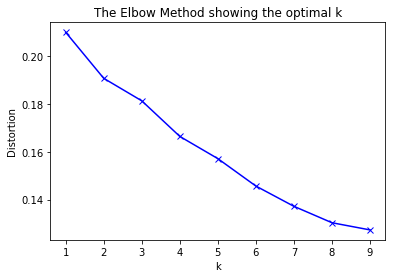

In [1104]:
#checking the k using elbow method
SF_grouped_clustering = SF_grouped.drop('City', 1)
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(init="k-means++", n_clusters=k).fit(SF_grouped_clustering)
    kmeanModel.fit(SF_grouped_clustering)
    distortions.append(sum(np.min(cdist(SF_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / SF_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [1105]:
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.35324224445705965
For n_clusters = 3 The average silhouette_score is : 0.3740381846991288
For n_clusters = 4 The average silhouette_score is : 0.06175955525547112
For n_clusters = 5 The average silhouette_score is : 0.0669426176397799
For n_clusters = 6 The average silhouette_score is : 0.05211305398965616
For n_clusters = 7 The average silhouette_score is : 0.0576606284854901
For n_clusters = 8 The average silhouette_score is : 0.04502509525120853
For n_clusters = 9 The average silhouette_score is : 0.050732872417508304


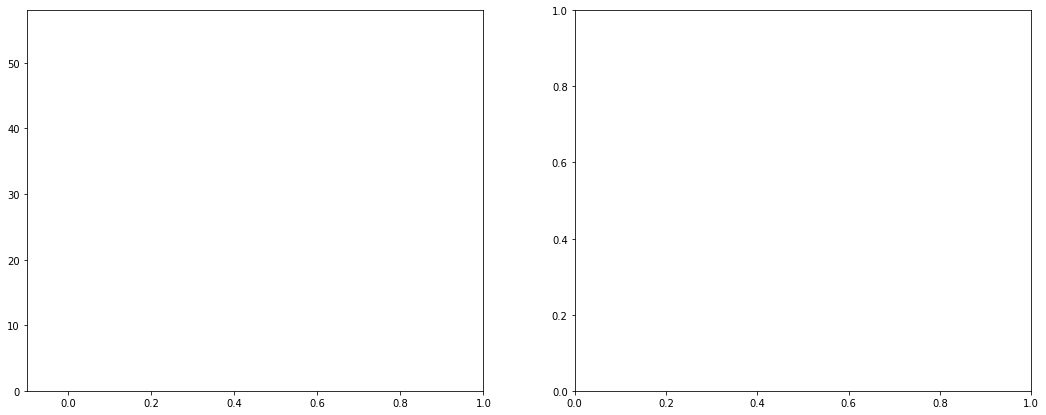

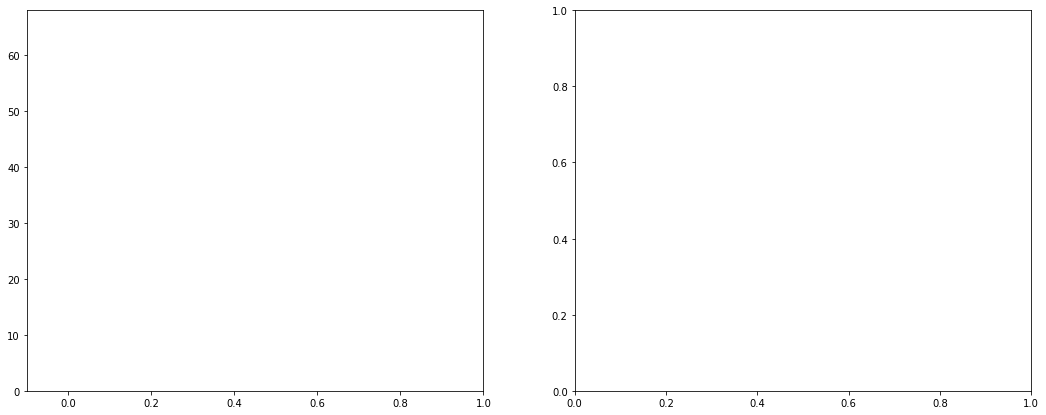

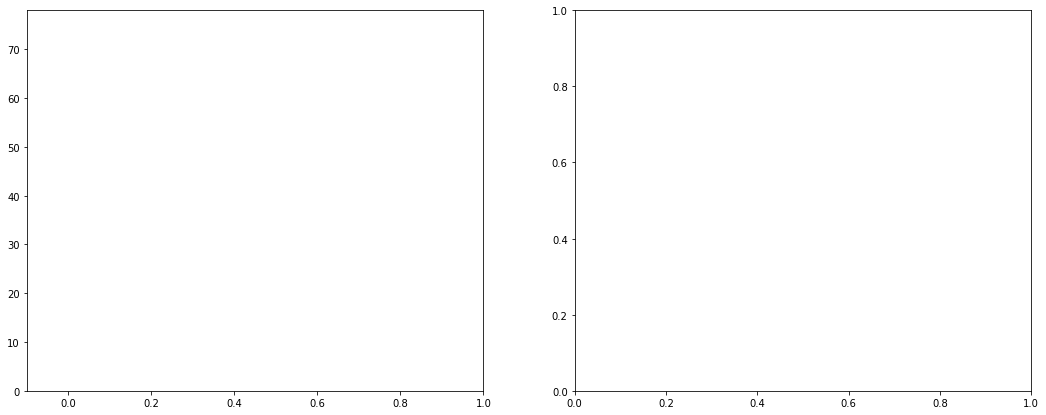

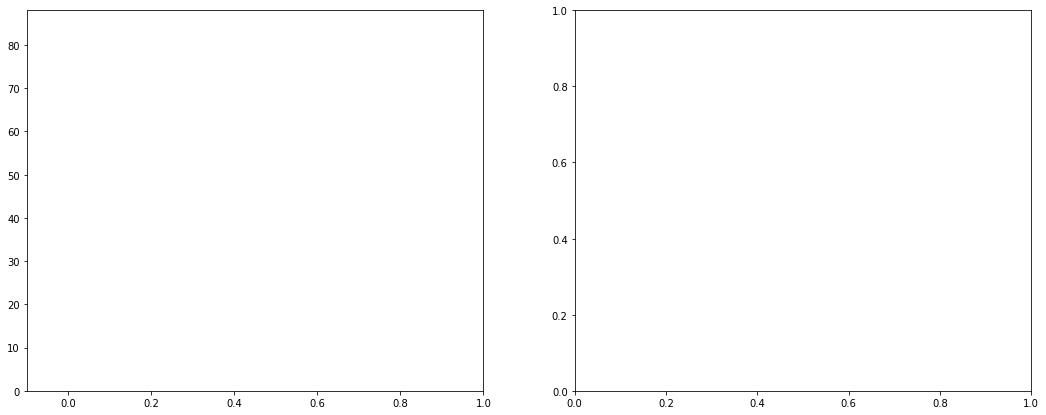

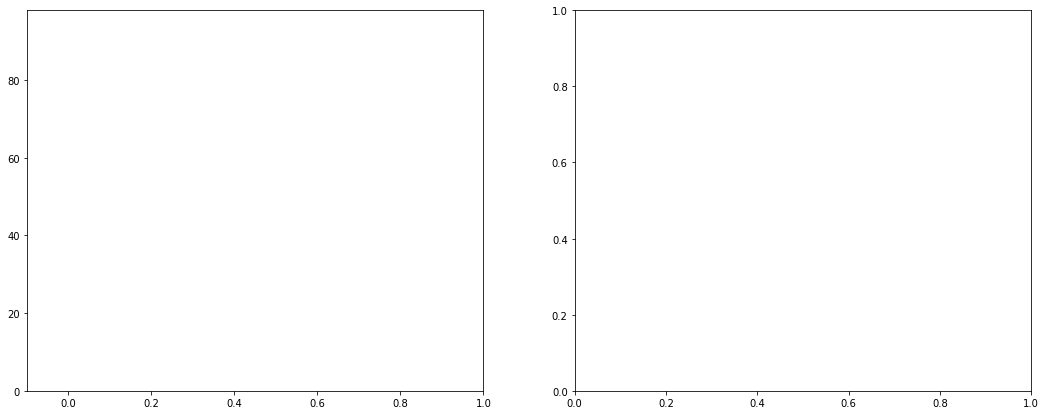

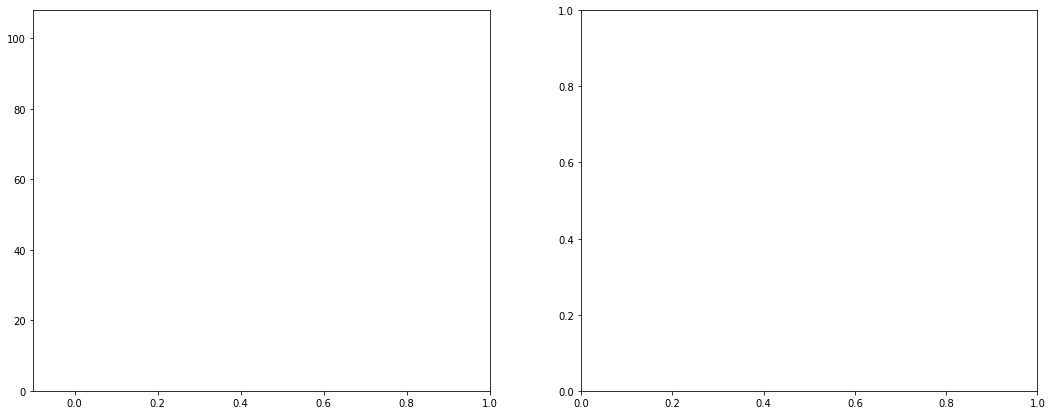

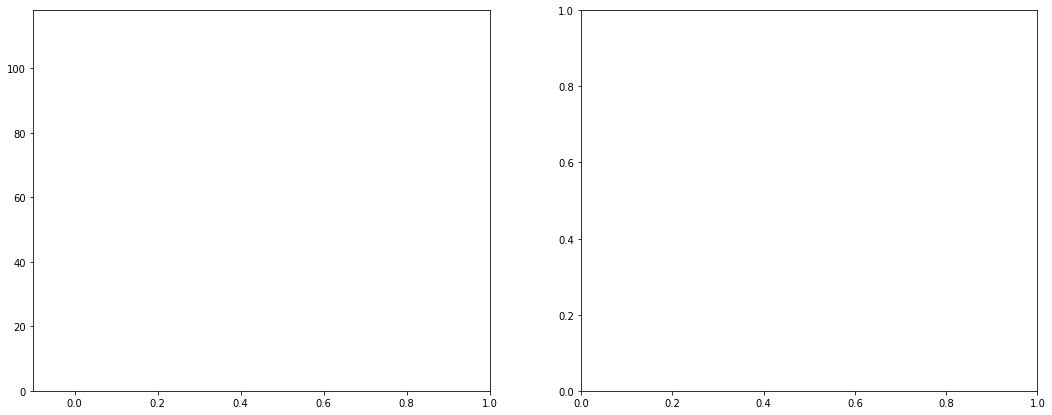

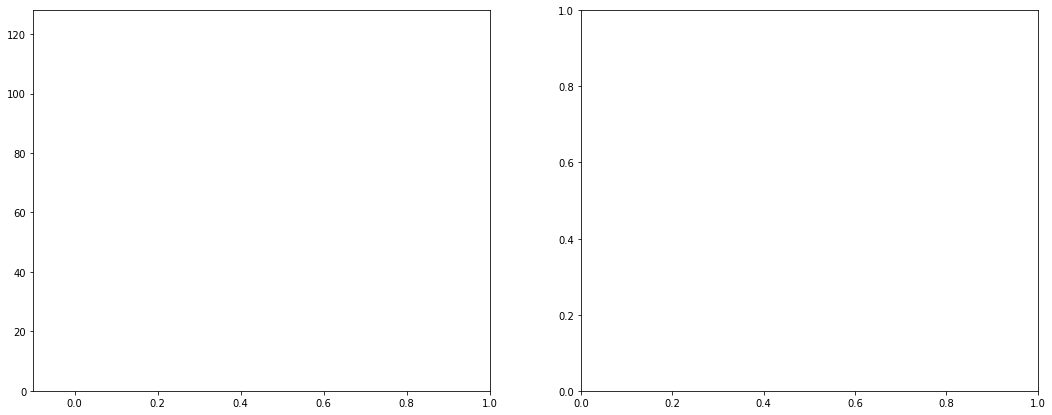

In [1115]:
#Checking the k using silhouette ananlysis
cluster_range = range( 2, 10 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(SF_grouped_clustering) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( SF_grouped_clustering )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(SF_grouped_clustering, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(SF_grouped_clustering, cluster_labels)

  

In [1116]:
# set number of clusters
kclusters = 3
# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=12).fit(SF_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

In [1117]:
# add clustering labels
Neighborhoods_venues_sorted.insert(0, 'Clusters', kmeans.labels_)

SF_merged = Neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
SF_merged = SF_merged.join(Neighborhoods_venues_sorted.set_index('City'), on='City')

SF_merged.head() # check the last columns!

,City,County,Address,Latitude,Longitude,Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Miami,Miami-Dade,"Miami, Miami-Dade",25.7617,-80.1918,0,Italian Restaurant,Hotel,Steakhouse,Argentinian Restaurant,Coffee Shop,Latin American Restaurant,Japanese Restaurant,Gym / Fitness Center,Residential Building (Apartment / Condo),Mediterranean Restaurant
1,Hialeah,Miami-Dade,"Hialeah, Miami-Dade",25.8576,-80.2781,1,Grocery Store,Cuban Restaurant,Discount Store,South American Restaurant,Soccer Stadium,Theater,Sandwich Place,Dive Shop,Chinese Restaurant,Fast Food Restaurant
2,Fort Lauderdale,Broward,"Fort Lauderdale, Broward",26.1224,-80.1373,0,American Restaurant,Sushi Restaurant,Italian Restaurant,Seafood Restaurant,Bar,Ice Cream Shop,Art Museum,Mexican Restaurant,Sandwich Place,Salon / Barbershop
3,Port St. Lucie,St. Lucie,"Port St. Lucie, St. Lucie",27.2730,-80.3582,1,Pizza Place,Gym / Fitness Center,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Discount Store,Shipping Store,Business Service,Rest Area,Pharmacy
4,Pembroke Pines,Broward,"Pembroke Pines, Broward",26.0078,-80.2963,0,Burger Joint,Furniture / Home Store,Pharmacy,Pizza Place,Coffee Shop,Restaurant,Lingerie Store,Fast Food Restaurant,Shopping Mall,Latin American Restaurant


## 8. Checking clusters and showing them on map

In [1118]:
SF_merged.Clusters.value_counts()

0    14
1    13
2     1
Name: Clusters, dtype: int64

In [1119]:
# create map
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=9)
map_clusters

In [1121]:

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SF_merged['Latitude'], SF_merged['Longitude'], SF_merged['City'], SF_merged['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-2],
        fill=True,
        fill_color=rainbow[int(cluster)-2],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## 9. Checking all the clusters

In [1122]:
# Cluster 1
SF_merged.loc[SF_merged['Clusters'] == 0, SF_merged.columns[[0] + list(range(5, SF_merged.shape[1]))]]


,City,Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Miami,0,Italian Restaurant,Hotel,Steakhouse,Argentinian Restaurant,Coffee Shop,Latin American Restaurant,Japanese Restaurant,Gym / Fitness Center,Residential Building (Apartment / Condo),Mediterranean Restaurant
2,Fort Lauderdale,0,American Restaurant,Sushi Restaurant,Italian Restaurant,Seafood Restaurant,Bar,Ice Cream Shop,Art Museum,Mexican Restaurant,Sandwich Place,Salon / Barbershop
4,Pembroke Pines,0,Burger Joint,Furniture / Home Store,Pharmacy,Pizza Place,Coffee Shop,Restaurant,Lingerie Store,Fast Food Restaurant,Shopping Mall,Latin American Restaurant
5,Hollywood,0,Bar,Peruvian Restaurant,Sandwich Place,Cocktail Bar,Sushi Restaurant,Mexican Restaurant,Latin American Restaurant,Coffee Shop,Pharmacy,Pizza Place
6,Miramar,0,Food Truck,BBQ Joint,Latin American Restaurant,Donut Shop,Basketball Court,Italian Restaurant,Performing Arts Venue,Spa,Gym / Fitness Center,Gymnastics Gym
9,West Palm Beach,0,Bar,Asian Restaurant,Wine Bar,Mexican Restaurant,French Restaurant,Restaurant,Middle Eastern Restaurant,Farmers Market,Park,Italian Restaurant
11,Davie,0,Coffee Shop,Bar,Hookah Bar,Baseball Field,Deli / Bodega,Dessert Shop,Pub,College Rec Center,Seafood Restaurant,Fast Food Restaurant
12,Miami Beach,0,Hotel,Lounge,Italian Restaurant,Beach,Bar,Bakery,Performing Arts Venue,Coffee Shop,Spa,Pharmacy
15,Boca Raton,0,American Restaurant,Department Store,Clothing Store,Cosmetics Shop,Lingerie Store,Jewelry Store,Burger Joint,Furniture / Home Store,Restaurant,Steakhouse
17,Boynton Beach,0,Department Store,Bakery,American Restaurant,Mexican Restaurant,Pet Store,Furniture / Home Store,Gym,Jewish Restaurant,Spa,Bookstore


In [1123]:
# Cluster 2
SF_merged.loc[SF_merged['Clusters'] == 1, SF_merged.columns[[0] + list(range(5, SF_merged.shape[1]))]]


,City,Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Hialeah,1,Grocery Store,Cuban Restaurant,Discount Store,South American Restaurant,Soccer Stadium,Theater,Sandwich Place,Dive Shop,Chinese Restaurant,Fast Food Restaurant
3,Port St. Lucie,1,Pizza Place,Gym / Fitness Center,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Discount Store,Shipping Store,Business Service,Rest Area,Pharmacy
7,Coral Springs,1,Italian Restaurant,Asian Restaurant,Indian Restaurant,Fast Food Restaurant,Pizza Place,Grocery Store,Theater,Spa,Sandwich Place,Fried Chicken Joint
8,Miami Gardens,1,Fast Food Restaurant,Fried Chicken Joint,Pizza Place,Athletics & Sports,Caribbean Restaurant,Strip Club,Seafood Restaurant,Bakery,Clothing Store,Shoe Store
10,Pompano Beach,1,Fast Food Restaurant,Convenience Store,Intersection,Pizza Place,Donut Shop,Mediterranean Restaurant,Café,Flea Market,Food Truck,Fried Chicken Joint
13,Plantation,1,Park,Light Rail Station,Coffee Shop,Fast Food Restaurant,Liquor Store,South American Restaurant,Seafood Restaurant,Lawyer,Flower Shop,Sandwich Place
14,Sunrise,1,Mobile Phone Shop,Coffee Shop,Caribbean Restaurant,Latin American Restaurant,Hotel,Big Box Store,American Restaurant,Rental Car Location,Colombian Restaurant,Discount Store
16,Deerfield Beach,1,Seafood Restaurant,Fast Food Restaurant,Thrift / Vintage Store,Sandwich Place,Donut Shop,Mobile Phone Shop,Pharmacy,Burger Joint,Shipping Store,Salon / Barbershop
18,Lauderhill,1,Caribbean Restaurant,Business Service,Shoe Store,Discount Store,Indian Restaurant,Big Box Store,Intersection,Toll Plaza,Laundromat,Yoga Studio
22,Tamarac,1,Gym,Grocery Store,Pharmacy,Furniture / Home Store,Fast Food Restaurant,Liquor Store,Donut Shop,Lawyer,Food & Drink Shop,Food Truck


In [1125]:
# Cluster 3
SF_merged.loc[SF_merged['Clusters'] == 2, SF_merged.columns[[0] + list(range(5, SF_merged.shape[1]))]]

,City,Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Weston,2,Business Service,Home Service,Golf Course,Park,Department Store,Eastern European Restaurant,Flea Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant


### Checking the nature of Cluster 1 by exploring the top 3 most common venues

In [1128]:
CLuster1 = SF_merged.loc[SF_merged['Clusters'] == 0, SF_merged.columns[[0] + list(range(5, SF_merged.shape[1]))]]

In [1148]:
CLuster1['1st Most Common Venue'].value_counts()

Bar                    2
American Restaurant    2
Italian Restaurant     1
Department Store       1
Coffee Shop            1
Burger Joint           1
Hotel                  1
Sandwich Place         1
Pizza Place            1
Food Truck             1
Mexican Restaurant     1
Convenience Store      1
Name: 1st Most Common Venue, dtype: int64

In [1151]:
CLuster1['2nd Most Common Venue'].value_counts()

Italian Restaurant        2
BBQ Joint                 1
Lounge                    1
Bakery                    1
Department Store          1
Pizza Place               1
Sushi Restaurant          1
Bar                       1
Furniture / Home Store    1
American Restaurant       1
Hotel                     1
Peruvian Restaurant       1
Asian Restaurant          1
Name: 2nd Most Common Venue, dtype: int64

In [1152]:
CLuster1['3rd Most Common Venue'].value_counts()

Italian Restaurant           2
Latin American Restaurant    1
Steakhouse                   1
Wine Bar                     1
Hookah Bar                   1
Sandwich Place               1
Pizza Place                  1
Clothing Store               1
New American Restaurant      1
Pharmacy                     1
American Restaurant          1
Donut Shop                   1
Grocery Store                1
Name: 3rd Most Common Venue, dtype: int64

#### Cluster 1 seems to be a Bar and Restaurant type with restaurants being American and Italian 

### Checking the nature of Cluster 2 by exploring the top 3 most common venues

In [1149]:
Cluster2 = SF_merged.loc[SF_merged['Clusters'] == 1, SF_merged.columns[[0] + list(range(5, SF_merged.shape[1]))]]
Cluster2['1st Most Common Venue'].value_counts()

Fast Food Restaurant    3
Pizza Place             3
Italian Restaurant      1
Mobile Phone Shop       1
Caribbean Restaurant    1
Seafood Restaurant      1
Park                    1
Gym                     1
Grocery Store           1
Name: 1st Most Common Venue, dtype: int64

In [1153]:
Cluster2 = SF_merged.loc[SF_merged['Clusters'] == 1, SF_merged.columns[[0] + list(range(5, SF_merged.shape[1]))]]
Cluster2['2nd Most Common Venue'].value_counts()

Fast Food Restaurant    1
Light Rail Station      1
Gym / Fitness Center    1
Video Game Store        1
Grocery Store           1
Convenience Store       1
Fried Chicken Joint     1
Coffee Shop             1
Chinese Restaurant      1
Business Service        1
Discount Store          1
Asian Restaurant        1
Cuban Restaurant        1
Name: 2nd Most Common Venue, dtype: int64

In [1154]:
Cluster2 = SF_merged.loc[SF_merged['Clusters'] == 1, SF_merged.columns[[0] + list(range(5, SF_merged.shape[1]))]]
Cluster2['3rd Most Common Venue'].value_counts()

Sandwich Place               2
Breakfast Spot               1
Shoe Store                   1
Latin American Restaurant    1
Pharmacy                     1
Indian Restaurant            1
Coffee Shop                  1
Caribbean Restaurant         1
Pizza Place                  1
Intersection                 1
Thrift / Vintage Store       1
Discount Store               1
Name: 3rd Most Common Venue, dtype: int64

#### Cluster 2 seems to be with venues for fastfood - Pizzas and sandwiches

In [1150]:
Cluster3 = SF_merged.loc[SF_merged['Clusters'] == 2, SF_merged.columns[[0] + list(range(5, SF_merged.shape[1]))]]
Cluster3['1st Most Common Venue'].value_counts()

Business Service    1
Name: 1st Most Common Venue, dtype: int64

In [1155]:
Cluster3 = SF_merged.loc[SF_merged['Clusters'] == 2, SF_merged.columns[[0] + list(range(5, SF_merged.shape[1]))]]
Cluster3['2nd Most Common Venue'].value_counts()

Home Service    1
Name: 2nd Most Common Venue, dtype: int64

In [1156]:
Cluster3 = SF_merged.loc[SF_merged['Clusters'] == 2, SF_merged.columns[[0] + list(range(5, SF_merged.shape[1]))]]
Cluster3['3rd Most Common Venue'].value_counts()

Golf Course    1
Name: 3rd Most Common Venue, dtype: int64

#### Cluster 3 is more of business services and have only one city